# 📊 Telco Customer Churn - Exploratory Data Analysis (EDA)
**Author**: Muhammad Yousaf Khan  
**Date**: 2 May 2025

---

Welcome to the Exploratory Data Analysis (EDA) of the Telco Customer Churn dataset.  
This analysis helps us understand the structure, patterns, and potential signals in the data to predict customer churn effectively.


## ✅ Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Improve the visuals
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline


## 📂 Step 2: Load Dataset
We load the Telco Customer Churn dataset using Pandas and take a quick look at the top few rows.


In [2]:
df = pd.read_csv("telecom_churn.csv")  # Change filename if needed
print("✅ Dataset Loaded Successfully")
df.head()

✅ Dataset Loaded Successfully


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop(columns = ["customerID"], inplace = True)

## 📄 Step 3: Basic Information
We review the dataset's structure, shape, column types, and summary statistics.


In [4]:
df.shape

(7043, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
print("Column Names:", df.columns.tolist())

Column Names: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


## ❓ Step 4: Check for Missing Values
Identify and count missing data in each column.


In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 🔍 Step 5: Unique Values in Each Column
We check how many unique values exist in each column to help understand categorical variables


In [9]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 73
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
MonthlyCharges: 1585
TotalCharges: 6531
Churn: 2


In [10]:
for col in df.columns:
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        print(col, df[col].unique())
        print("-------------------------------------")

gender ['Female' 'Male']
-------------------------------------
SeniorCitizen [0 1]
-------------------------------------
Partner ['Yes' 'No']
-------------------------------------
Dependents ['No' 'Yes']
-------------------------------------
PhoneService ['No' 'Yes']
-------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
-------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
-------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
-------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
-------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
-------------------------------------
StreamingTV ['No' 'Yes' 'No internet service']
-------------------------------------
StreamingMovies ['No' 'Yes' 'No internet service']
-------------------------------------
Contra

In [11]:
for col in df.columns:
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        print(col, df[col].value_counts())
        print("-------------------------------------")

gender gender
Male      3555
Female    3488
Name: count, dtype: int64
-------------------------------------
SeniorCitizen SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
-------------------------------------
Partner Partner
No     3641
Yes    3402
Name: count, dtype: int64
-------------------------------------
Dependents Dependents
No     4933
Yes    2110
Name: count, dtype: int64
-------------------------------------
PhoneService PhoneService
Yes    6361
No      682
Name: count, dtype: int64
-------------------------------------
MultipleLines MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
-------------------------------------
InternetService InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
-------------------------------------
OnlineSecurity OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dt

## 🧹 Step 6: Data Cleaning
Simplfy problematic columns like `tenure, MonthlyCharges, TotalCharges`, and handle missing values/ or spaces if present.


In [12]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    print(col, len(df[df[col]== " "]))
    print("-------------------------------------")

tenure 0
-------------------------------------
MonthlyCharges 0
-------------------------------------
TotalCharges 11
-------------------------------------


In [13]:
df['TotalCharges'] = df['TotalCharges'].replace({" ": "0.0"}).astype(float)

## 📊 Step 7: Exploratory Data Analysis
Explore individual features using count plots and histograms to understand distributions and categories.


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
df.shape

(7043, 20)

In [16]:
df.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [17]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [19]:
def plot_distribution_advanced(df, column_name):
    plt.figure(figsize=(14, 5))
    
    # Distribution Plot
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name], kde=True, color="#2196F3", edgecolor="black", alpha=0.7)
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    plt.axvline(col_mean, color="red", linestyle="--", linewidth=2, label=f"Mean: {col_mean:.2f}")
    plt.axvline(col_median, color="blue", linestyle="--", linewidth=2, label=f"Median: {col_median:.2f}")
    plt.title(f"Distribution of {column_name}", fontsize=14, fontweight='bold')
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column_name], color="#FFC107", linewidth=2)
    plt.title(f"Boxplot of {column_name}", fontsize=14, fontweight='bold')
    plt.grid(True, axis='y', linestyle="--", alpha=0.5)

    plt.suptitle(f"Statistical Overview of '{column_name}'", fontsize=16, fontweight='bold', color="#4CAF50")
    plt.tight_layout()
    plt.show()


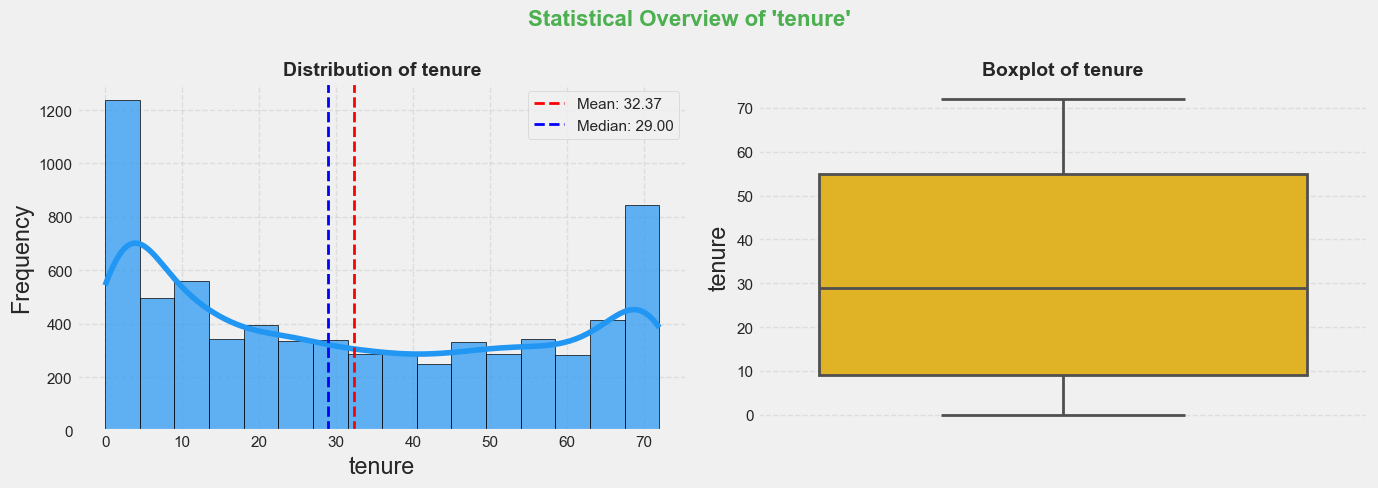

In [20]:
plot_distribution_advanced(df, "tenure")

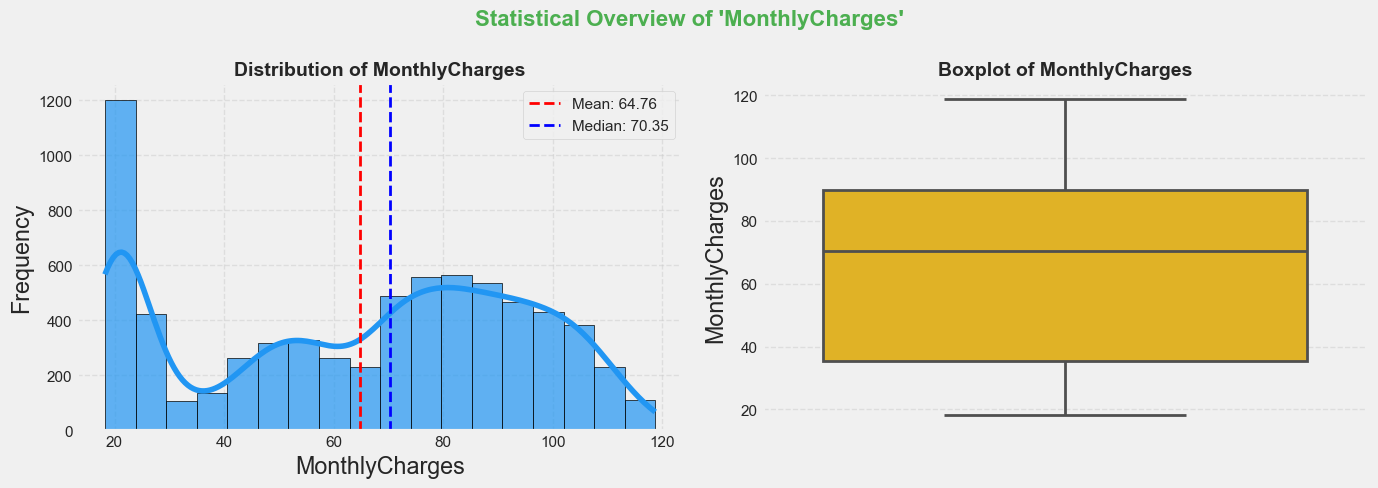

In [21]:
plot_distribution_advanced(df, "MonthlyCharges")

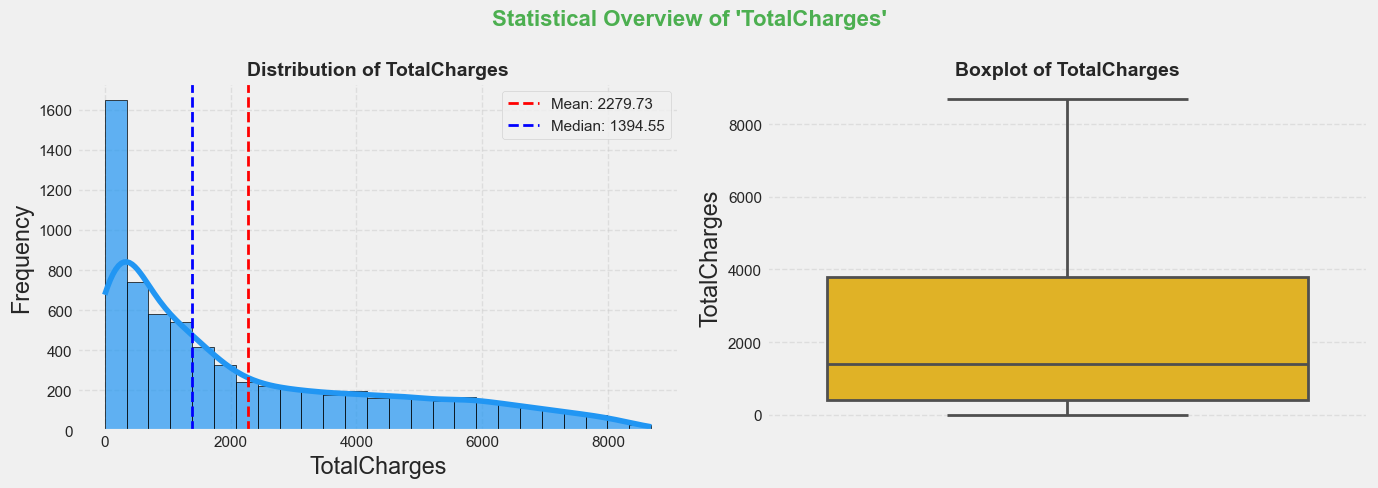

In [22]:
plot_distribution_advanced(df, "TotalCharges")

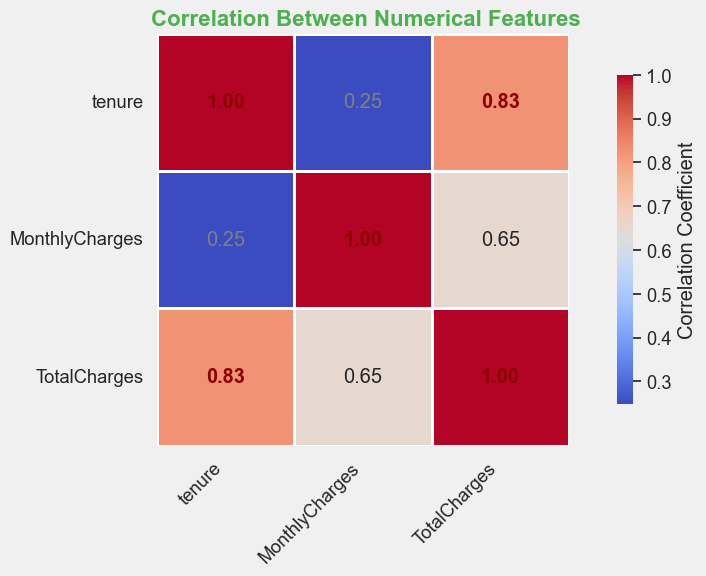

In [23]:
plt.figure(figsize=(10, 6))

sns.set(font_scale=1.2)  # Increase font size
sns.set_style("whitegrid")  # Clean grid background

# Heatmap with better color, annotation, and visuals
ax = sns.heatmap(
    df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=2,
    linecolor='white',
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

plt.title(" Correlation Between Numerical Features", fontsize=16, fontweight='bold', color="#4CAF50")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add value-based coloring for annotations
for text in ax.texts:
    value = float(text.get_text())
    if abs(value) >= 0.7:
        text.set_weight('bold')
        text.set_color('darkred')
    elif abs(value) <= 0.3:
        text.set_color('gray')

plt.tight_layout()
plt.show()


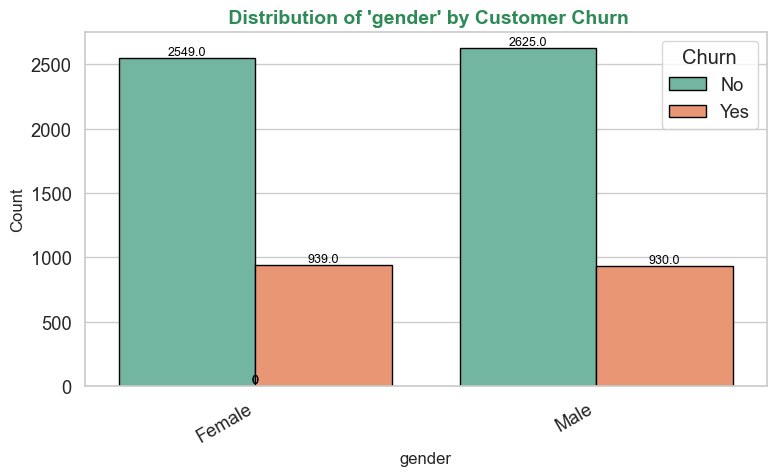

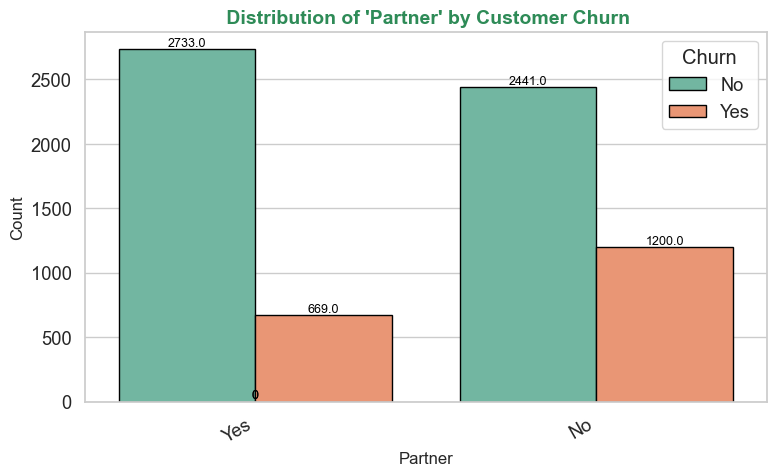

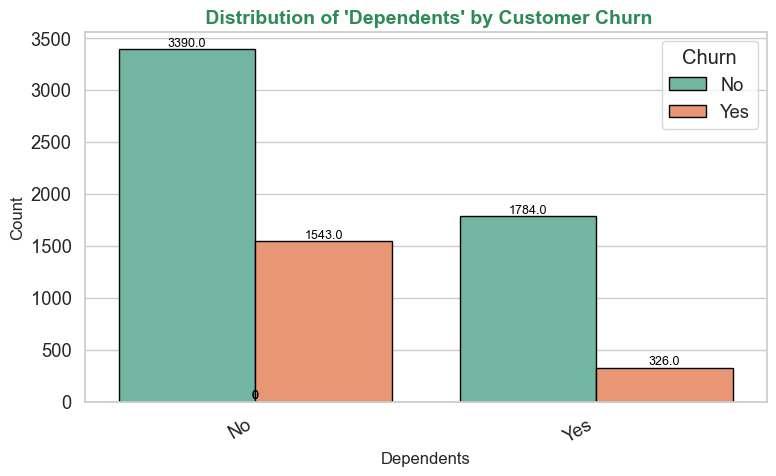

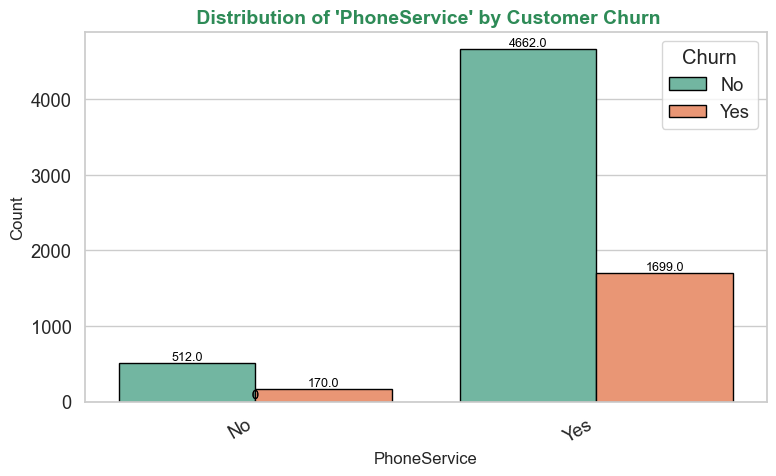

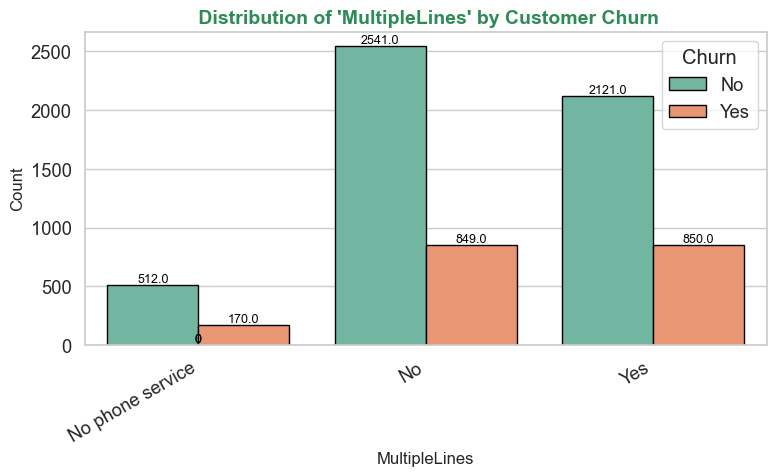

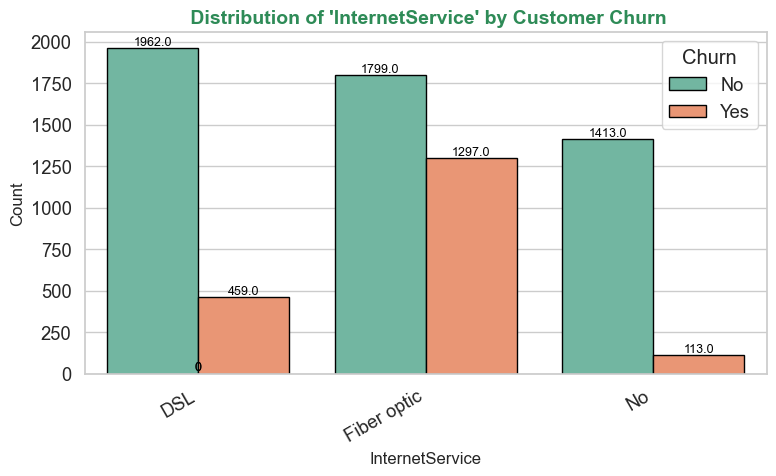

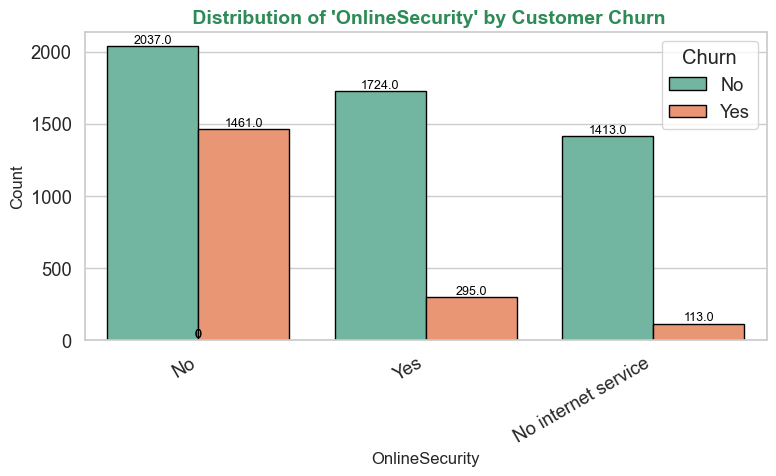

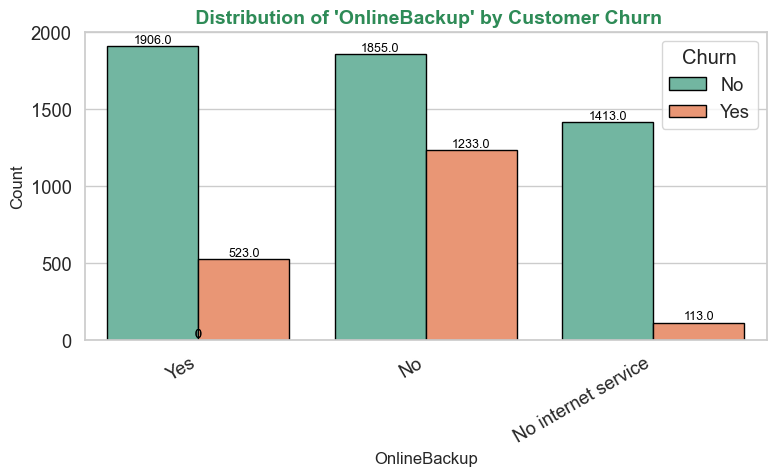

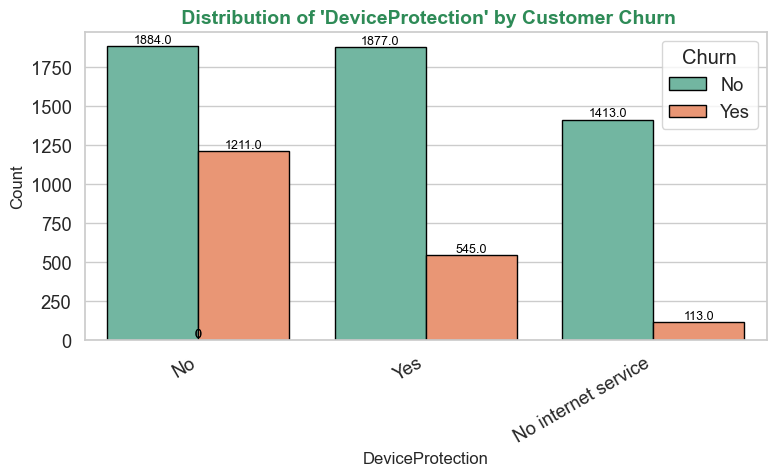

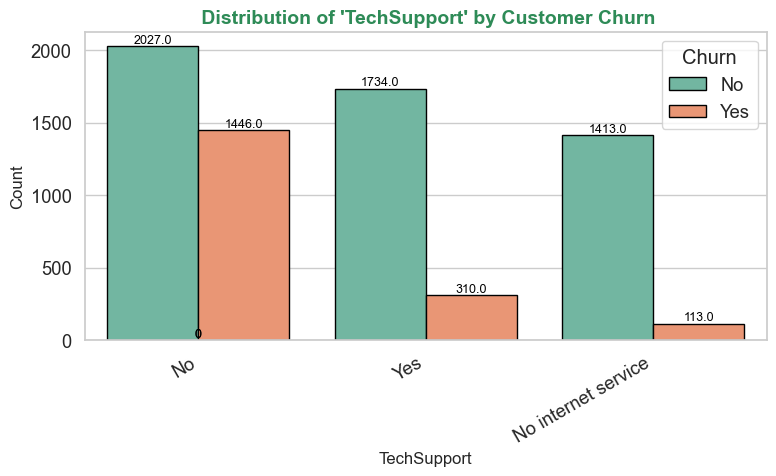

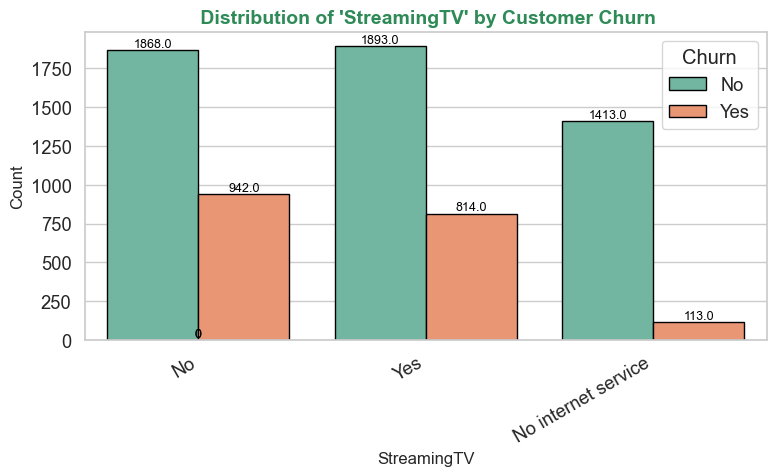

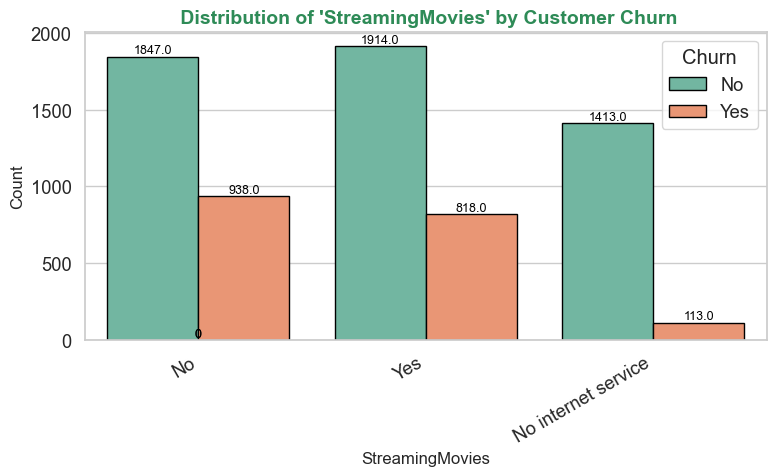

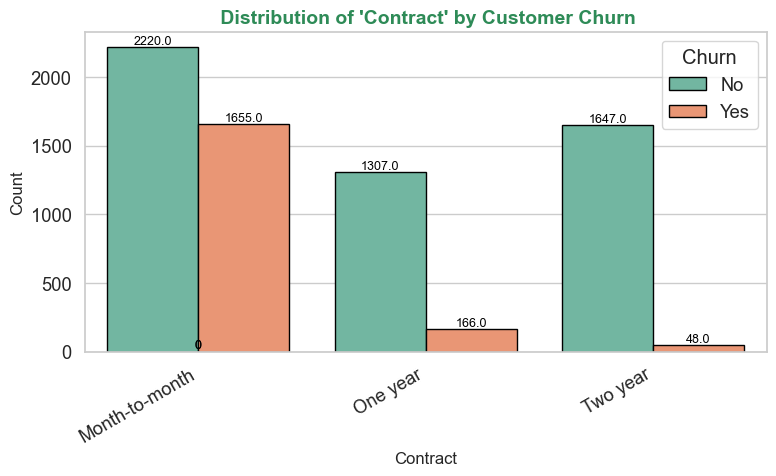

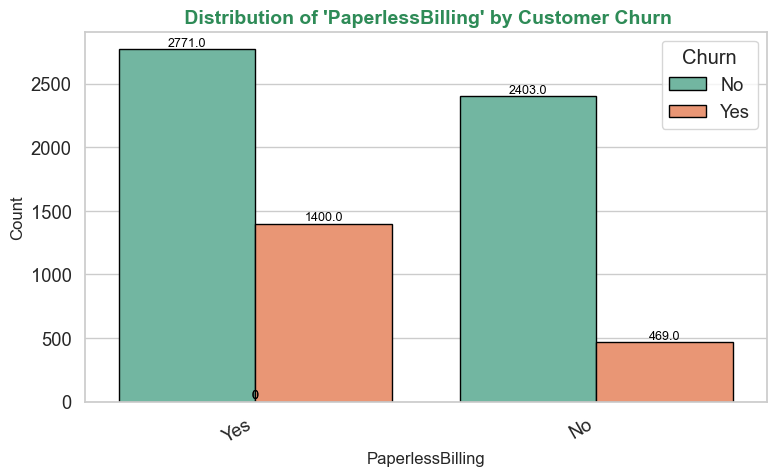

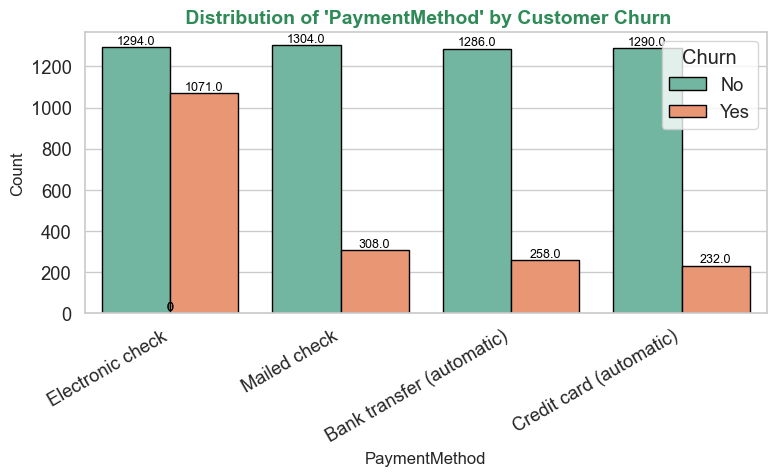

In [24]:
# Identify all object-type columns
categorical_cols = df.select_dtypes(include='object').columns.to_list()

# Explicitly remove 'SeniorCitizen' as there are flot values in it and latter on we will change its data type InshAllah.
if 'SeniorCitizen' in categorical_cols:
    categorical_cols.remove('SeniorCitizen')
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

# Styling
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Plotting
for col in categorical_cols:
    plt.figure(figsize=(8,5 ))
    ax = sns.countplot(data=df, x=col, hue='Churn', edgecolor='black')

    # Titles and labels
    plt.title(f" Distribution of '{col}' by Customer Churn", fontsize=14, fontweight='bold', color="#2E8B57")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=30, ha='right')
    plt.legend(title='Churn', loc='upper right')

    # Count annotations
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black')

    plt.tight_layout()
    plt.show()


In [25]:
#convert 'Churn' bolean to 1/0.
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})
df["Churn"] = df["Churn"].astype(int)

In [26]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [27]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    
    print(f"{column}: Found {len(outliers)} outliers")
    return outliers


In [28]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    detect_outliers_iqr(df, col)


tenure: Found 0 outliers
MonthlyCharges: Found 0 outliers
TotalCharges: Found 0 outliers


In [29]:
objects_columns = df.select_dtypes(include='object').columns.tolist()
objects_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [30]:
# List of columns to check for unwanted categories
columns_to_check = [
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

print(" Unwanted text values BEFORE cleaning:\n")
for col in columns_to_check:
    unique_vals = df[col].unique()
    unwanted = [val for val in unique_vals if "No internet service" in str(val) or "No phone service" in str(val)]
    if unwanted:
        print(f"{col}: {unwanted}")



 Unwanted text values BEFORE cleaning:

MultipleLines: ['No phone service']
OnlineSecurity: ['No internet service']
OnlineBackup: ['No internet service']
DeviceProtection: ['No internet service']
TechSupport: ['No internet service']
StreamingTV: ['No internet service']
StreamingMovies: ['No internet service']


In [31]:
# Now replace unwanted text with 'No'
for col in columns_to_check:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

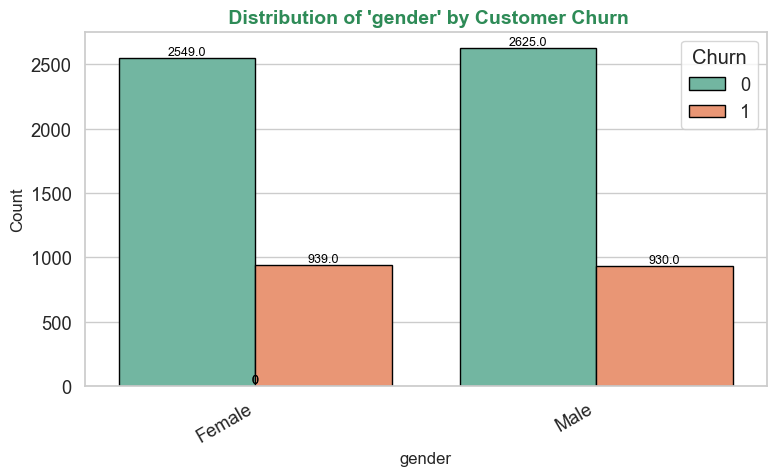

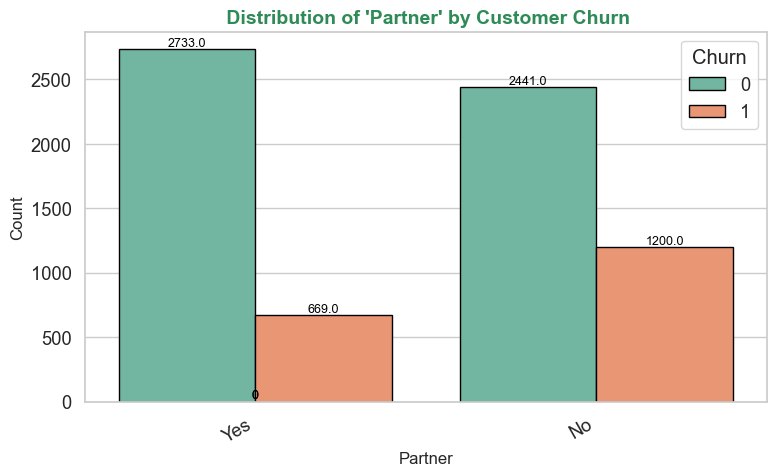

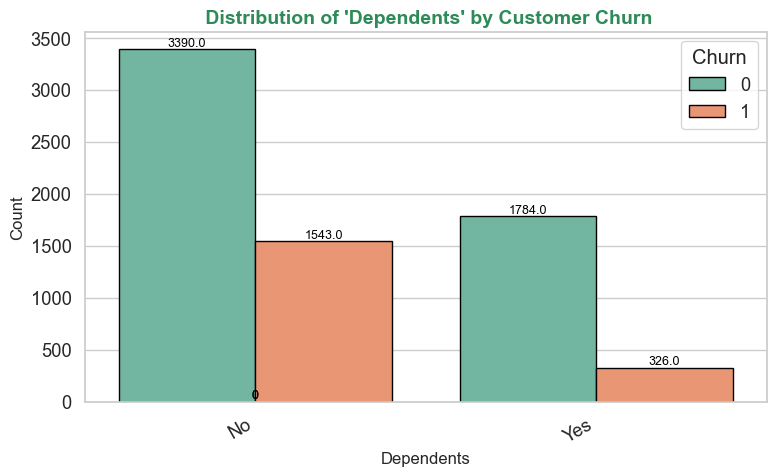

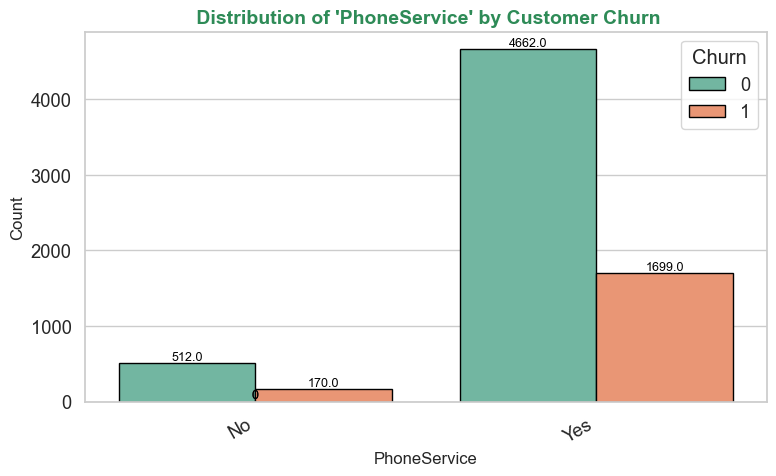

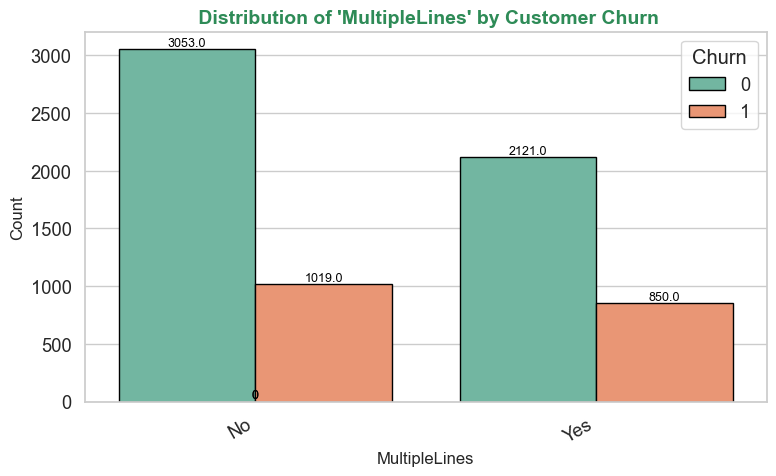

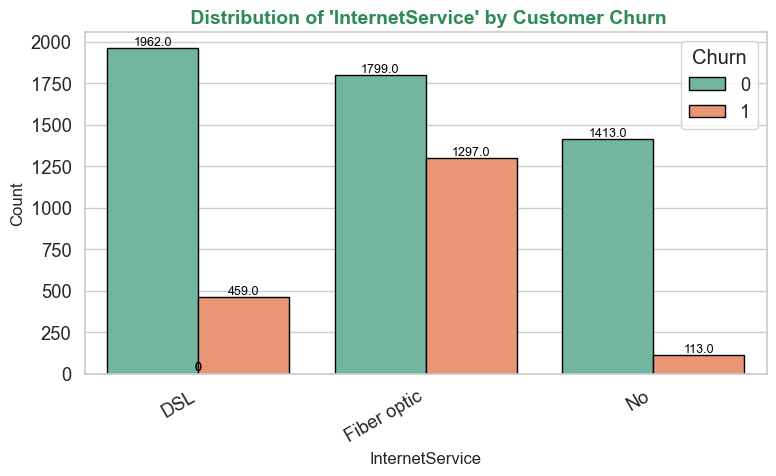

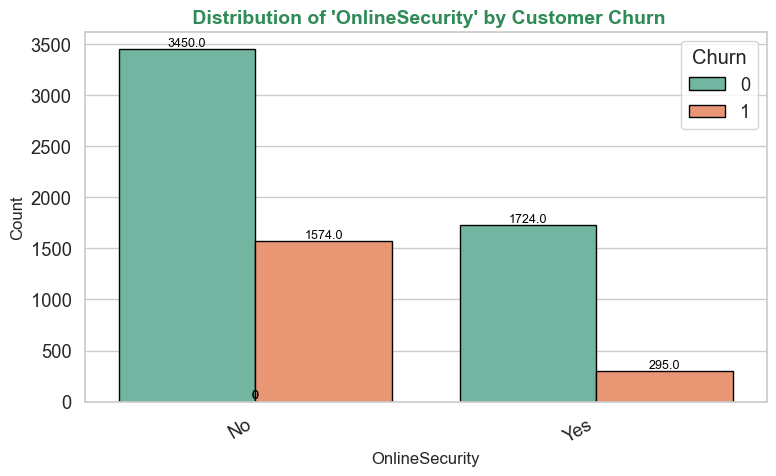

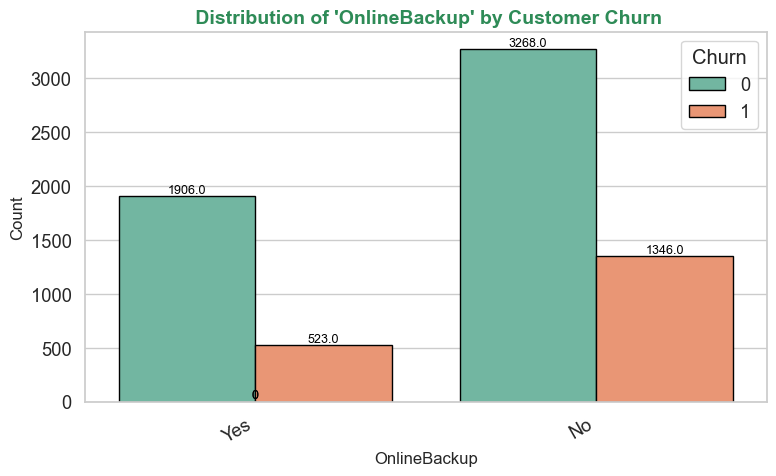

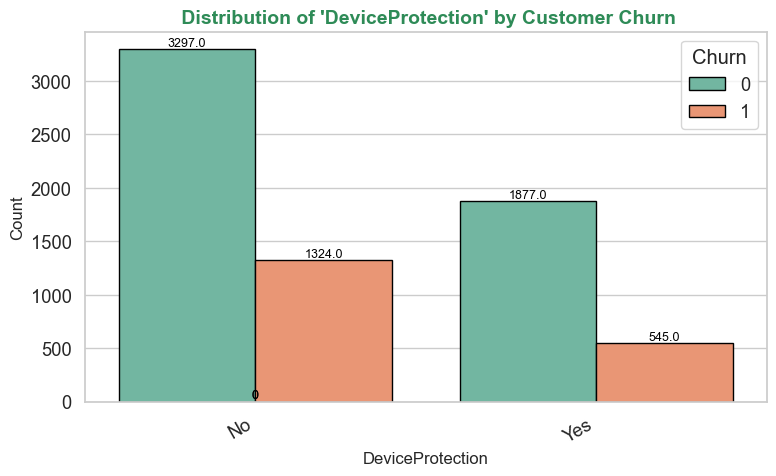

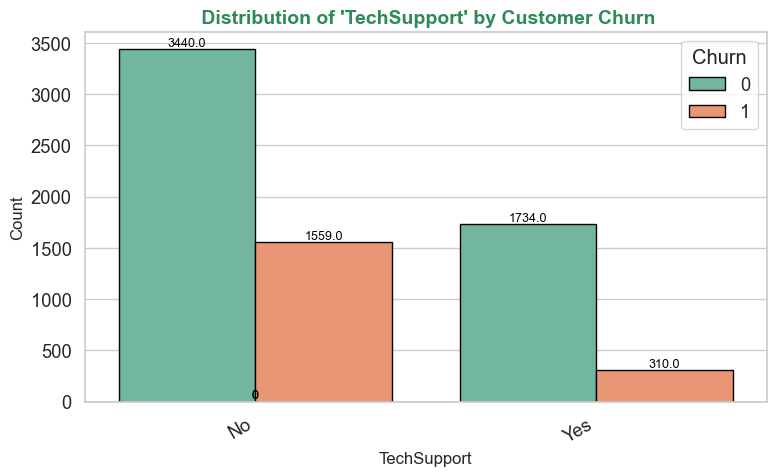

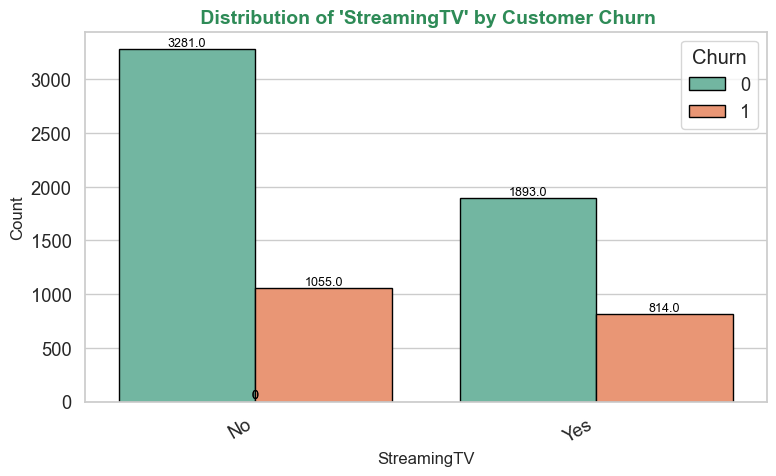

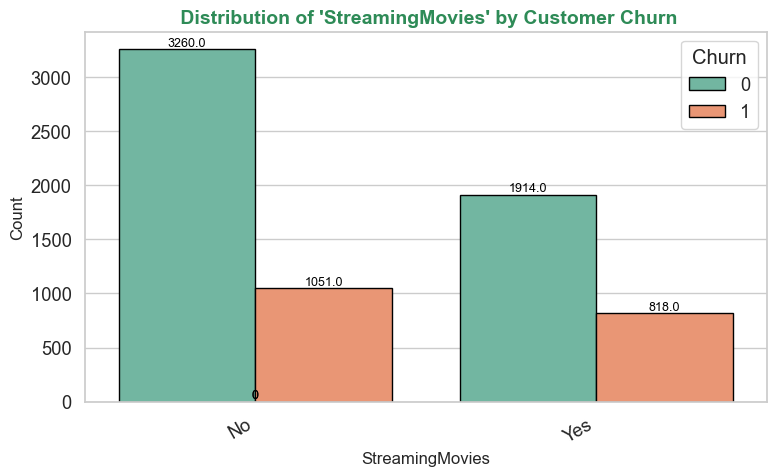

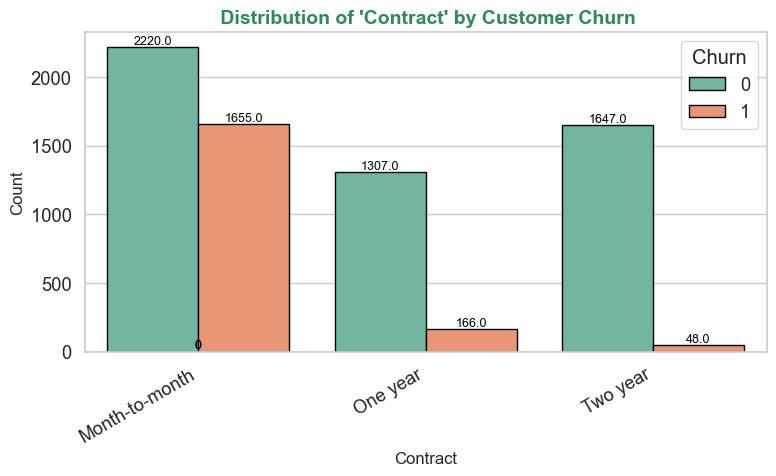

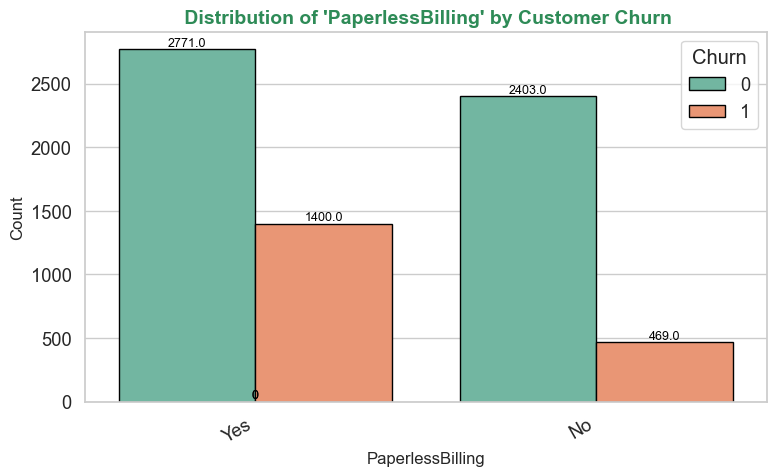

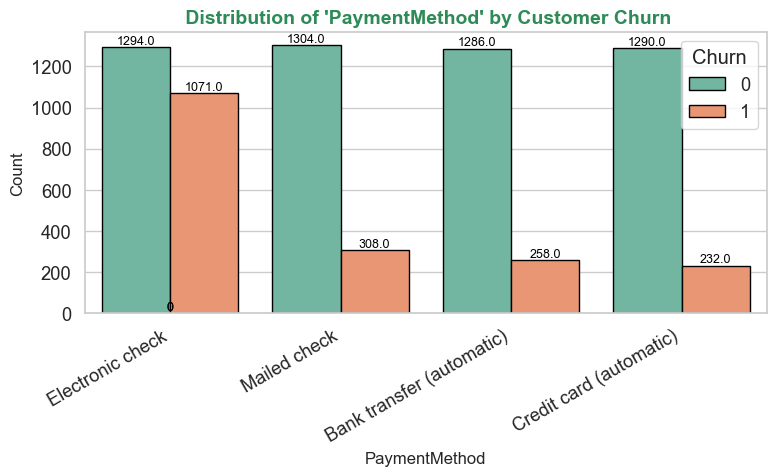

In [32]:
# Identify all object-type columns
categorical_cols = df.select_dtypes(include='object').columns.to_list()

# Explicitly remove 'SeniorCitizen' if accidentally included
if 'SeniorCitizen' in categorical_cols:
    categorical_cols.remove('SeniorCitizen')
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

# Styling
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Plotting
for col in categorical_cols:
    plt.figure(figsize=(8,5 ))
    ax = sns.countplot(data=df, x=col, hue='Churn', edgecolor='black')

    # Titles and labels
    plt.title(f" Distribution of '{col}' by Customer Churn", fontsize=14, fontweight='bold', color="#2E8B57")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=30, ha='right')
    plt.legend(title='Churn', loc='upper right')

    # Count annotations
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black')

    plt.tight_layout()
    plt.show()


## Now its all good we can now move on to labelencoding and model building

## 🔗 Step 8: Bivariate Analysis
Understand how different features relate to the target variable `Churn`.


In [33]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for column in objects_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder
    print(f"Encoded {column}: {label_encoder.classes_}")


Encoded gender: ['Female' 'Male']
Encoded Partner: ['No' 'Yes']
Encoded Dependents: ['No' 'Yes']
Encoded PhoneService: ['No' 'Yes']
Encoded MultipleLines: ['No' 'Yes']
Encoded InternetService: ['DSL' 'Fiber optic' 'No']
Encoded OnlineSecurity: ['No' 'Yes']
Encoded OnlineBackup: ['No' 'Yes']
Encoded DeviceProtection: ['No' 'Yes']
Encoded TechSupport: ['No' 'Yes']
Encoded StreamingTV: ['No' 'Yes']
Encoded StreamingMovies: ['No' 'Yes']
Encoded Contract: ['Month-to-month' 'One year' 'Two year']
Encoded PaperlessBilling: ['No' 'Yes']
Encoded PaymentMethod: ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']


In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), objects_columns)
    ],
    remainder='passthrough'
)


In [35]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [37]:
import pickle
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [40]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [41]:
# Import Required Libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [42]:
#  Defining Target and Features
X = df.drop(columns=['Churn'])
y = df['Churn']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
# Handle Imbalanced Classes Using SMOTE
print("Before SMOTE:", y_train.value_counts())
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Churn
0    4139
1    1495
Name: count, dtype: int64
After SMOTE: Churn
0    4139
1    4139
Name: count, dtype: int64


In [45]:
# Define Models and Hyperparameters
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
   # "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')

}

In [46]:
hyperparameters = {
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [10, None]
    },
    "XGBoost": {
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    }
}

In [47]:
# Hyperparameter Tuning Using GridSearchCV
best_models = {}

for model_name, model in models.items():
    print(f"\n🔧 Tuning {model_name}...")
    grid = GridSearchCV(estimator=model,
                        param_grid=hyperparameters[model_name],
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1)
    
    grid.fit(X_train_smote, y_train_smote)
    best_models[model_name] = grid.best_estimator_
    
    print(f"✅ Best Parameters: {grid.best_params_}")
    print(f"✅ Best CV Accuracy: {grid.best_score_:.4f}")


🔧 Tuning Random Forest...
✅ Best Parameters: {'max_depth': None, 'n_estimators': 100}
✅ Best CV Accuracy: 0.8420

🔧 Tuning XGBoost...
✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 5}
✅ Best CV Accuracy: 0.8129


In [48]:
# === 8. Evaluate Models on Test Set === #
for name, model in best_models.items():
    print(f"\n📊 Evaluation of {name} on Test Data:")
    y_pred = model.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📊 Evaluation of Random Forest on Test Data:
Accuracy: 0.7672107877927609
ROC AUC: 0.7254281949934123
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84      1035
           1       0.55      0.64      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.71      1409
weighted avg       0.78      0.77      0.77      1409

Confusion Matrix:
 [[843 192]
 [136 238]]

📊 Evaluation of XGBoost on Test Data:
Accuracy: 0.765791341376863
ROC AUC: 0.7543452427084141
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.54      0.73      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409

Confusion Matrix:
 [[806 229]
 [101 273]]


In [49]:
best_models

{'Random Forest': RandomForestClassifier(random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, ...)}

In [50]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_models['Random Forest'], f)

In [51]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [52]:
y_test_pred = best_models['Random Forest'].predict(X_test)
y_test_prob = best_models['Random Forest'].predict_proba(X_test)[:, 1]

In [53]:
y_test_pred

array([0, 1, 0, ..., 0, 0, 0])

In [54]:
y_test_prob

array([0.  , 0.85, 0.07, ..., 0.22, 0.09, 0.01])

In [55]:
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
with open("encoder.pkl", "rb") as f:
    encoders = pickle.load(f)
with open("scaler.pkl", "rb") as f:
    scaler_data =pickle.load(f)

In [60]:

def make_prediction(input_data):
    input_df = pd.DataFrame([input_data])  # Convert dict to DataFrame

    # Apply encoders to categorical columns
    for col, encoder in encoders.items():
        if col in input_df.columns:
            try:
                input_df[col] = encoder.transform([input_df[col].values[0]])
            except Exception as e:
                print(f"Encoding failed for column '{col}' with value '{input_df[col].values[0]}': {e}")
                return None, None

    # Scale numerical columns
    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])

    # Predict
    prediction = model.predict(input_df)
    probability = model.predict_proba(input_df)

    return prediction[0], probability[0][1]


In [61]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [62]:
example_input = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 12,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'Yes',
    'OnlineBackup': 'No',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 70.35,
    'TotalCharges': 1397.475
}


In [63]:
prediction, prob = make_prediction(example_input)

In [64]:
print(f"Prediction: {prediction}, Probability : {prob : .2f}")

Prediction: 1, Probability :  0.62
